In [1]:
import os

import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from wordcloud import WordCloud
from gensim.models import Word2Vec
from gensim import models, corpora
import nltk
import ast

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

ModuleNotFoundError: No module named 'pandas'

# Exploratory Data Analysis (EDA)

In [4]:
df = pd.read_csv('philosophy_data.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360808 entries, 0 to 360807
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   title                      360808 non-null  object
 1   author                     360808 non-null  object
 2   school                     360808 non-null  object
 3   sentence_spacy             360808 non-null  object
 4   sentence_str               360808 non-null  object
 5   original_publication_date  360808 non-null  int64 
 6   corpus_edition_date        360808 non-null  int64 
 7   sentence_length            360808 non-null  int64 
 8   sentence_lowered           360808 non-null  object
 9   tokenized_txt              360808 non-null  object
 10  lemmatized_str             360808 non-null  object
dtypes: int64(3), object(8)
memory usage: 30.3+ MB


In [62]:
df.tail()

,title,author,school,sentence_str,original_publication_date,sentence_length,sentence_lowered,tokenized_txt,lemmatized_str,compound_sent_score,tokenized_txt_new
360803,"Women, Race, And Class",Davis,feminism,But the socialization of housework including m...,1981,142,but the socialization of housework including m...,"['but', 'the', 'socialization', 'of', 'housewo...",but the socialization of housework include me...,0.8462,"['But', 'the', 'socialization', 'of', 'housewo..."
360804,"Women, Race, And Class",Davis,feminism,The only significant steps toward endingdomest...,1981,117,the only significant steps toward endingdomest...,"['the', 'only', 'significant', 'steps', 'towar...",the only significant step toward endingdomest...,-0.6124,"['The', 'only', 'significant', 'steps', 'towar..."
360805,"Women, Race, And Class",Davis,feminism,"Working women, therefore, have a special and v...",1981,90,"working women, therefore, have a special and v...","['working', 'women', 'therefore', 'have', 'spe...","working woman , therefore , have a special an...",0.6808,"['Working', 'women', ',', 'therefore', ',', 'h..."
360806,"Women, Race, And Class",Davis,feminism,"Moreover, under capitalism, campaigns for jobs...",1981,199,"moreover, under capitalism, campaigns for jobs...","['moreover', 'under', 'capitalism', 'campaigns...","moreover , under capitalism , campaign for jo...",0.4939,"['Moreover', ',', 'under', 'capitalism', ',', ..."
360807,"Women, Race, And Class",Davis,feminism,This strategy calls into question the validity...,1981,126,this strategy calls into question the validity...,"['this', 'strategy', 'calls', 'into', 'questio...",this strategy call into question the validity...,0.0000,"['This', 'strategy', 'calls', 'into', 'questio..."


In [22]:
# sentiment analysis
sia = SentimentIntensityAnalyzer()
df['sentiment_scores'] = df['sentence_str'].apply(lambda x: sia.polarity_scores(x))
df['neg'] = df['sentiment_scores'].apply(lambda x: x['neg'])
df['neu'] = df['sentiment_scores'].apply(lambda x: x['neu'])
df['pos'] = df['sentiment_scores'].apply(lambda x: x['pos'])
df['compound_sent_score'] = df['sentiment_scores'].apply(lambda x: x['compound'])



In [49]:
df.to_csv("preprocessed_df.csv")
df.head()

,title,author,school,sentence_spacy,sentence_str,original_publication_date,corpus_edition_date,sentence_length,sentence_lowered,tokenized_txt,lemmatized_str,sentiment_scores,neg,neu,pos,compound_sent_score
0,Plato - Complete Works,Plato,plato,"What's new, Socrates, to make you leave your ...","What's new, Socrates, to make you leave your ...",-350,1997,125,"what's new, socrates, to make you leave your ...","['what', 'new', 'socrates', 'to', 'make', 'you...","what be new , Socrates , to make -PRON- lea...","{'neg': 0.132, 'neu': 0.868, 'pos': 0.0, 'comp...",0.132,0.868,0.000,-0.2960
1,Plato - Complete Works,Plato,plato,Surely you are not prosecuting anyone before t...,Surely you are not prosecuting anyone before t...,-350,1997,69,surely you are not prosecuting anyone before t...,"['surely', 'you', 'are', 'not', 'prosecuting',...",surely -PRON- be not prosecute anyone before ...,"{'neg': 0.0, 'neu': 0.791, 'pos': 0.209, 'comp...",0.000,0.791,0.209,0.4404
2,Plato - Complete Works,Plato,plato,The Athenians do not call this a prosecution b...,The Athenians do not call this a prosecution b...,-350,1997,74,the athenians do not call this a prosecution b...,"['the', 'athenians', 'do', 'not', 'call', 'thi...",the Athenians do not call this a prosecution ...,"{'neg': 0.192, 'neu': 0.808, 'pos': 0.0, 'comp...",0.192,0.808,0.000,-0.3346
3,Plato - Complete Works,Plato,plato,What is this you say?,What is this you say?,-350,1997,21,what is this you say?,"['what', 'is', 'this', 'you', 'say']",what be this -PRON- say ?,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
4,Plato - Complete Works,Plato,plato,"Someone must have indicted you, for you are no...","Someone must have indicted you, for you are no...",-350,1997,101,"someone must have indicted you, for you are no...","['someone', 'must', 'have', 'indicted', 'you',...","someone must have indict -PRON- , for -PRON- ...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000


In [104]:
df = pd.read_csv("preprocessed_df.csv")

In [105]:
df.drop(columns=['Unnamed: 0','tokenized_txt_new','sentence_spacy','corpus_edition_date','sentiment_scores','pos','neg','neu'], inplace=True)

## Distributions

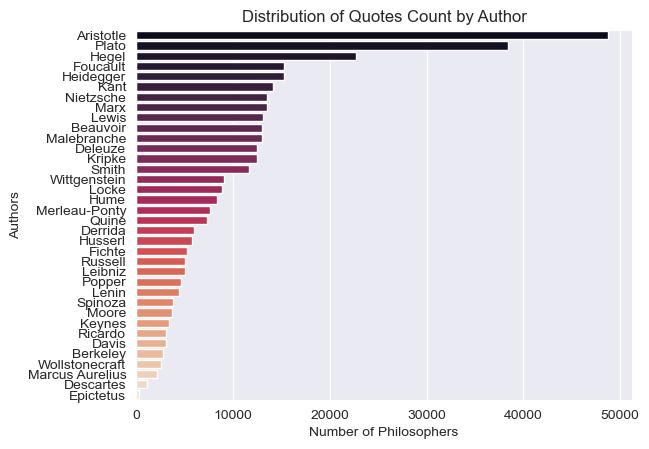

In [34]:
# Plot the distribution of philosopher count by author

# Group the data by author and count the number of philosophers per author
philosopher_count = df.groupby('author')['author'].count().reset_index(name='counts')

# Sort the philosopher_count dataframe in descending order of count
philosopher_count = philosopher_count.sort_values(by='counts', ascending=False)

# Plot the distribution of philosopher count by author
sns.set_style("darkgrid")
sns.barplot(y='author', x='counts', data=philosopher_count, palette="rocket")
plt.ylabel('Authors')
plt.xlabel('Number of Philosophers')
plt.title('Distribution of Quotes Count by Author')
plt.show() 

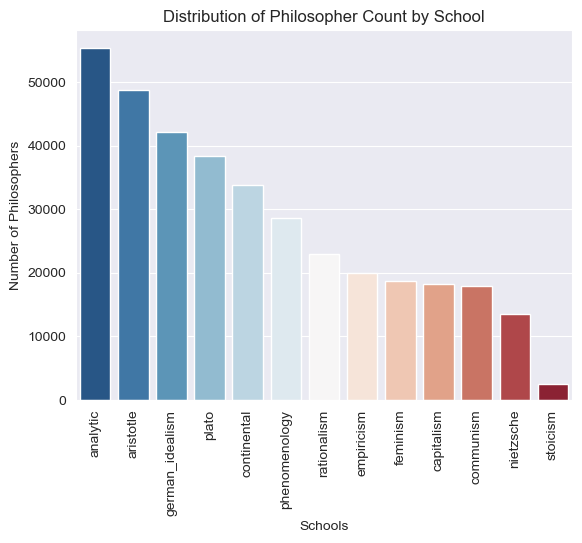

In [31]:

# Group the data by school and count the number of philosophers per school
philosopher_count = df.groupby('school')['school'].count().reset_index(name='counts')

# Sort the philosopher_count dataframe in descending order of count
philosopher_count = philosopher_count.sort_values(by='counts', ascending=False)

# Plot the distribution of philosopher count by school
sns.set_style("darkgrid")
sns.barplot(x='school', y='counts', data=philosopher_count, palette="RdBu_r")
plt.xticks(rotation=90)
plt.xlabel('Schools')
plt.ylabel('Number of Philosophers')
plt.title('Distribution of Philosopher Count by School')
plt.show()



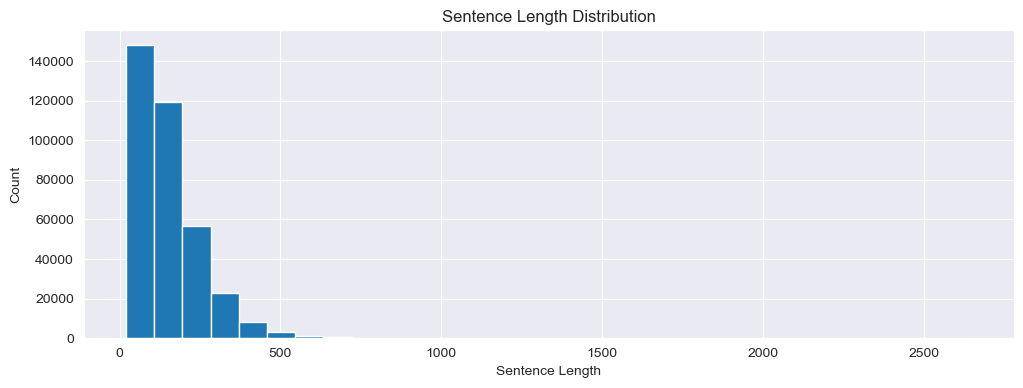

In [52]:
# Plot the distribution of sentence length
df.sentence_length.plot(kind='hist', figsize=(12,4), title='Sentence Length Distribution', bins = 30)
plt.xlabel('Sentence Length')
plt.ylabel('Count')
plt.show()

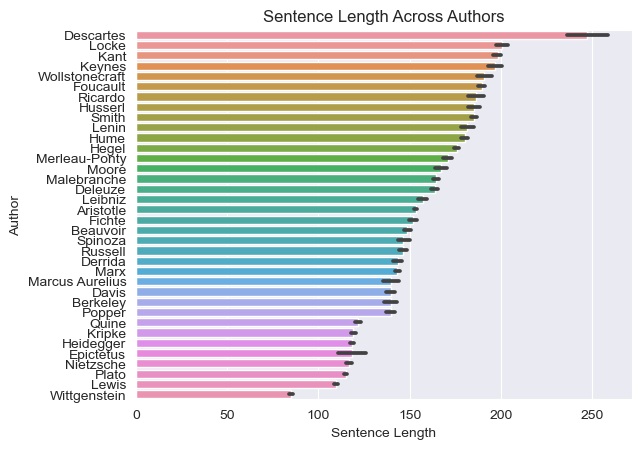

In [73]:
# Plot the sentence length distribution across authors
sns.set_style("darkgrid")
sns.barplot(y='author', x='sentence_length', data=df, order = df.groupby(['author']).sentence_length.mean().sort_values(ascending = False).index)

plt.ylabel('Author')
plt.xlabel('Sentence Length')
plt.title('Sentence Length Across Authors')
plt.show()


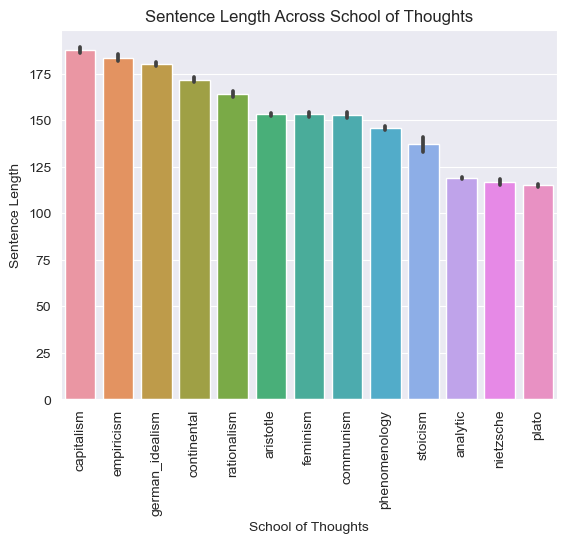

In [74]:
# plot the sentence length across the school of thoughts
sns.set_style("darkgrid")
sns.barplot(x='school', y='sentence_length', 
            data=df, 
            order = df.groupby(['school']).sentence_length.mean().sort_values(ascending = False).index)

plt.xlabel('School of Thoughts')
plt.ylabel('Sentence Length')
plt.title('Sentence Length Across School of Thoughts')
plt.xticks(rotation=90)
plt.show()

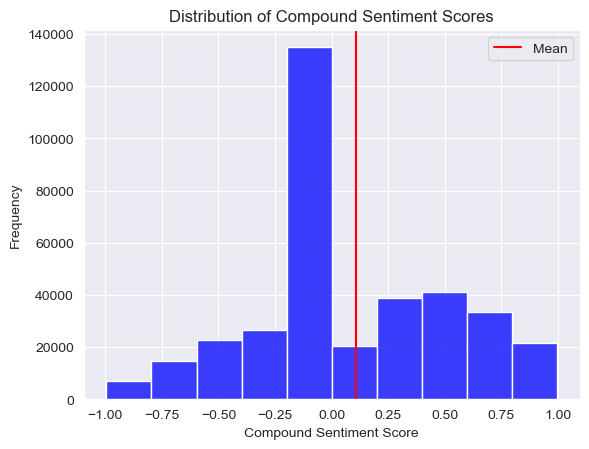

In [109]:
# Plot the distribution of compound sentiment scores
sns.set_style("darkgrid")
sns.histplot(df['compound_sent_score'], color="blue", bins=10)

# Calculate the mean of the compound sentiment scores
mean_sentiment = df['compound_sent_score'].mean()

# Add a vertical line indicating the mean
plt.axvline(mean_sentiment, color='red', label='Mean')


plt.xlabel('Compound Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Compound Sentiment Scores')
plt.legend()
plt.show()

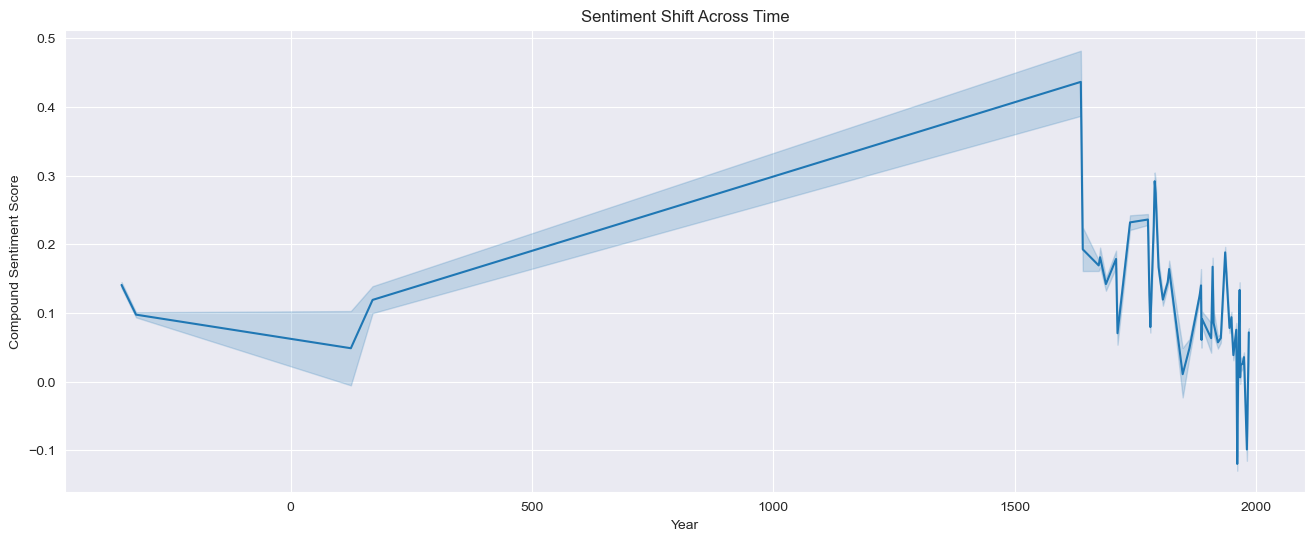

In [144]:
# over all sentiment shift across time

# Plot the mean compound sentiment score by year
plt.figure(figsize=(16,6))

sns.lineplot(x='original_publication_date', y='compound_sent_score', data=df)

plt.xlabel('Year')
plt.ylabel('Compound Sentiment Score')
# plt.ticklabel_format(useOffset=False)
plt.title('Sentiment Shift Across Time')
plt.show()


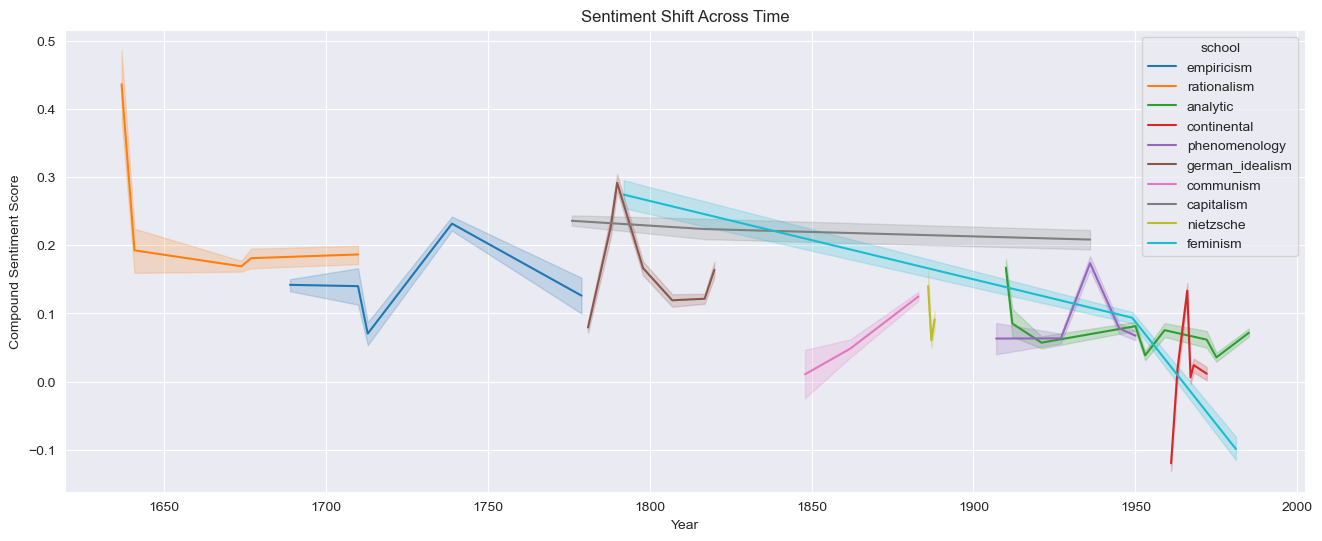

In [149]:
# polt of sentiment shift across time based on school of thoughts
plt.figure(figsize=(16,6))
sns.lineplot(x='original_publication_date', y='compound_sent_score', hue = 'school', data=df[df['original_publication_date'] >=1000])

plt.xlabel('Year')
plt.ylabel('Compound Sentiment Score')
# plt.ticklabel_format(useOffset=False)
plt.title('Sentiment Shift Across Time')

plt.show()

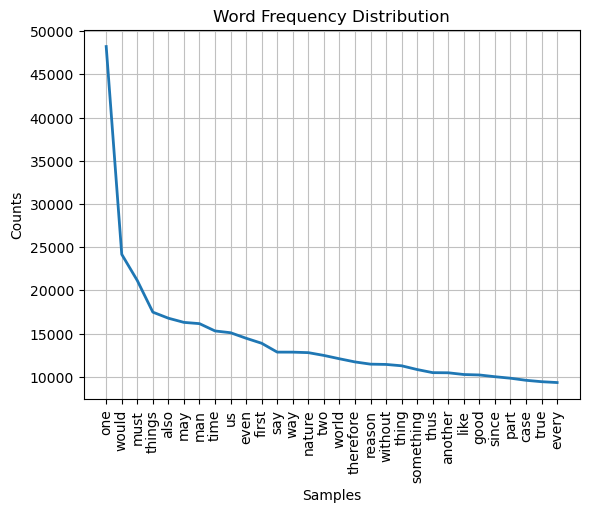

<AxesSubplot:title={'center':'Word Frequency Distribution'}, xlabel='Samples', ylabel='Counts'>

In [33]:
# text analysis 

# df['tokenized_txt_new'] = df['sentence_str'].apply(lambda x: word_tokenize(x))

#Flatten the list of tokens into a single list
# ast.literal_eval convert a list in the form of string into a actual list
# df['tokenized_txt'] = df['tokenized_txt'].apply(lambda x: ast.literal_eval(x))

all_tokens = [token for tokens in df['tokenized_txt'] for token in tokens]

# Remove stop words from the tokenized text
stop_words = set(stopwords.words("english"))
all_tokens = [token for token in all_tokens if token.lower() not in stop_words]

# Plot the word frequency distribution
fd = FreqDist(all_tokens)
fd.plot(30, cumulative=False, title='Word Frequency Distribution')


In [34]:
num_unique_words = len(set(all_tokens))
print(f"Number of unique words: {num_unique_words}")

Number of unique words: 90187


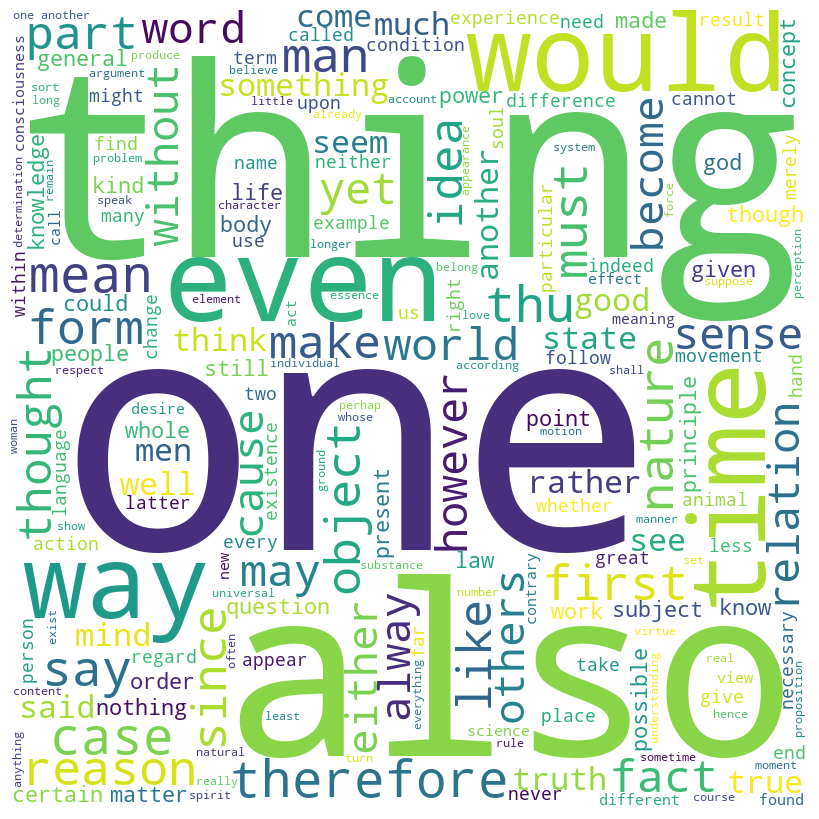

In [38]:
# make a wordcloud

all_tokens_str = ' '.join(all_tokens)
wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=stop_words, min_font_size=10).generate(all_tokens_str)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


In [42]:
# train a word2vec model

w2v_model = Word2Vec(df['tokenized_txt'], min_count=1)

In [151]:
# save the model
# w2v_model.save("w2v_model.gensim")
model = models.Word2Vec.load("w2v_model.gensim")

In [158]:
print("Most similar words to 'philosophy': ", model.wv.most_similar('opinion'))

Most similar words to 'philosophy':  [('belief', 0.7138453125953674), ('conviction', 0.6783464550971985), ('opinions', 0.6752085089683533), ('suggestion', 0.6548367738723755), ('assertion', 0.6430374383926392), ('testimony', 0.6365859508514404), ('judgment', 0.6309381723403931), ('thesis', 0.6210658550262451), ('argument', 0.6115370392799377), ('doctrine', 0.610156238079071)]


首先进行EDA

再总览地分析之后，我们注意到了在sentiment analysis中，随着时间的进行，sentiment score下降了，我想探寻是哪些school of thoughts造成了score的下降。 

近现代的score低， 选取其中的几个 feminism, 

wordcloud 找school 用得多的词

然后选一些common words 放到不同school 的w2v model玩一玩 

看看有什么区别

